# Power of Feature Engineering
Compare the performance of logistic regression to a DNN Classifier on a non-linear dataset. This is to show that similar accuracy, to the DNN, can be acheived by using logistic regression with transformations of the data. 

## Prepare Data

In [288]:
import numpy as np
import pandas as pd

n_points = 1000

age = np.linspace(18,60,n_points) 
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) 
np.random.shuffle(performance) 

noise = np.random.randn(n_points) 

g = (0.5 * age) +2*(performance) + age**2 + 1000*age/performance -10000 + 100*noise
y = [1 if y>=0 else 0 for y in g] 
print(sum(y))

data = [[age,performance,y]



data = pd.DataFrame(data=[age,performance,y], columns=["age", "performance","y"])


245


ValueError: 3 columns passed, passed data had 1000 columns

In [271]:
data.head()

AttributeError: 'list' object has no attribute 'head'

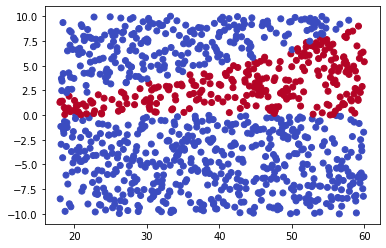

In [252]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data['age'],data['performance'],c=data['Y'],cmap='coolwarm',alpha = 1)

In [19]:
## Logistic Regression

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

X = data[['age','performance']]
x_train, x_test, y_train, y_test = train_test_split(X,y_true,test_size=0.3, random_state = 101)

log_model = sm.Logit(y_train,x_train).fit(disp=0)

print(log_model)
print(log_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  700
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               -0.001187
Time:                        19:21:36   Log-Likelihood:                -397.37
converged:                       True   LL-Null:                       -396.90
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.0237      0.002    -10.503      0.000      -0.028      -0.019
performance     0.1099      0.016      6.984      0.000       0.079       0.141


In [86]:
predictions = np.around(log_model.predict(x_test))
accuracy_score(y_test,predictions) 

0.67

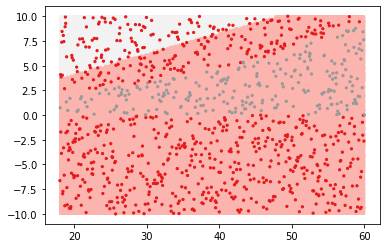

In [87]:
n_points = 1000000

x1_boundary = np.linspace(18,60,n_points)
np.random.shuffle(x1_boundary)
x2_boundary= np.linspace(-10,10,n_points)
np.random.shuffle(x2_boundary)

plot_data = pd.concat([pd.DataFrame(data=x1_boundary,columns=['X1']),pd.DataFrame(data=x2_boundary,columns=['X2'])],axis=1)

y_boundary = np.around(log_model.predict(plot_data))

plt.scatter(plot_data['X1'],plot_data['X2'],c=y_boundary,cmap='Pastel1',alpha =1,s=1)
plt.scatter(data['age'],data['performance'],c=data['Y'],cmap='Set1',alpha = 1, s=5)

### Add transformations and interactions


In [93]:
data['X3'] = age**2
data['X4'] = age/performance

In [94]:
X = data[['age','performance','X3','X4']]
x_train, x_test, y_train, y_test = train_test_split(X,y_true,test_size=0.3, random_state = 101)

log_model = sm.Logit(y_train,x_train).fit(disp=0)

print(log_model)
print(log_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  700
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                  0.9718
Time:                        14:00:56   Log-Likelihood:                -11.207
converged:                       True   LL-Null:                       -397.97
Covariance Type:            nonrobust   LLR p-value:                2.389e-167
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -2.1033      0.613     -3.429      0.001      -3.305      -0.901
performance    -2.7647      0.819     -3.378      0.001      -4.369      -1.160
X3              0.0359      0.011      3.385    

In [95]:
predictions = np.around(log_model.predict(x_test))
accuracy_score(y_test,predictions) 

0.9866666666666667

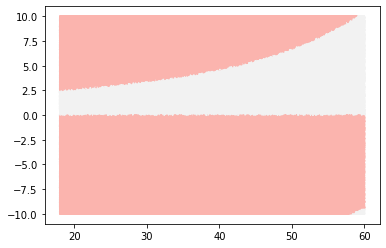

In [99]:
plot_data['X3'] = plot_data['X1']**2
plot_data['X4'] = plot_data['X1']/plot_data['X2']

y_boundary = np.around(log_model.predict(plot_data))

plt.scatter(plot_data['X1'],plot_data['X2'],c=y_boundary,cmap='Pastel1',alpha =1,s=1)
#plt.scatter(data['X1'],data['X2'],c=data['Y'],cmap='Set1',alpha = 1, s=5)

## DNN Classifier


In [176]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [242]:
X = data[['age','performance']]
y= data['Y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [243]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
700/700 [==============================] - 0s 390us/step - loss: 0.7608 - accuracy: 0.7200
Epoch 2/150
700/700 [==============================] - 0s 113us/step - loss: 0.3892 - accuracy: 0.8243
Epoch 3/150
700/700 [==============================] - 0s 106us/step - loss: 0.2923 - accuracy: 0.9529
Epoch 4/150
700/700 [==============================] - 0s 108us/step - loss: 0.2223 - accuracy: 0.9529
Epoch 5/150
700/700 [==============================] - 0s 117us/step - loss: 0.1794 - accuracy: 0.9614
Epoch 6/150
700/700 [==============================] - 0s 107us/step - loss: 0.1582 - accuracy: 0.9600
Epoch 7/150
700/700 [==============================] - 0s 109us/step - loss: 0.1411 - accuracy: 0.9643
Epoch 8/150
700/700 [==============================] - 0s 120us/step - loss: 0.1283 - accuracy: 0.9700
Epoch 9/150
700/700 [==============================] - 0s 108us/step - loss: 0.1208 - accuracy: 0.9771
Epoch 10/150
700/700 [==============================] - 0s 103us/step - l

700/700 [==============================] - 0s 96us/step - loss: 0.0389 - accuracy: 0.9857
Epoch 80/150
700/700 [==============================] - 0s 101us/step - loss: 0.0366 - accuracy: 0.9914
Epoch 81/150
700/700 [==============================] - 0s 120us/step - loss: 0.0347 - accuracy: 0.9886
Epoch 82/150
700/700 [==============================] - 0s 146us/step - loss: 0.0388 - accuracy: 0.9843
Epoch 83/150
700/700 [==============================] - 0s 117us/step - loss: 0.0378 - accuracy: 0.9857
Epoch 84/150
700/700 [==============================] - 0s 119us/step - loss: 0.0371 - accuracy: 0.9871
Epoch 85/150
700/700 [==============================] - 0s 120us/step - loss: 0.0342 - accuracy: 0.9871
Epoch 86/150
700/700 [==============================] - 0s 118us/step - loss: 0.0363 - accuracy: 0.9829
Epoch 87/150
700/700 [==============================] - 0s 118us/step - loss: 0.0379 - accuracy: 0.9857
Epoch 88/150
700/700 [==============================] - 0s 92us/step - loss: 0

In [244]:
accuracy = model.evaluate(X, y)
#print('Accuracy: %.2f' % (accuracy*100))
accuracy

# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]
rounded

accuracy_score(y,rounded) 

1000/1000 [==============================] - 0s 38us/step


0.992

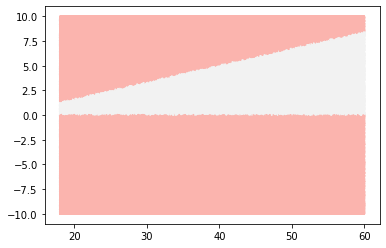

In [246]:
n_points = 1000000

x1_boundary = np.linspace(18,60,n_points)
np.random.shuffle(x1_boundary)
x2_boundary= np.linspace(-10,10,n_points)
np.random.shuffle(x2_boundary)

plot_data = pd.concat([pd.DataFrame(data=x1_boundary,columns=['X1']),pd.DataFrame(data=x2_boundary,columns=['X2'])],axis=1)


y_boundary = np.around(model.predict(plot_data))

plt.scatter(plot_data['X1'],plot_data['X2'],c=y_boundary,cmap='Pastel1',alpha =1,s=1)
#plt.scatter(data['X1'],data['X2'],c=data['Y'],cmap='Set1',alpha = 1, s=5)

# ARCHIVE 

In [110]:
age = tf.feature_column.numeric_column('age')
performance = tf.feature_column.numeric_column('performance')

feat_cols = [age,performance]
print(len(x_train))
print(len(y_train))
x_train

700
700


,age,performance
290,52.558559,-4.194194
167,54.744745,-6.656657
486,40.702703,-0.270270
683,59.033033,3.673674
876,25.861862,7.537538
...,...,...
575,31.747748,1.511512
838,45.663664,6.776777
337,31.705706,-3.253253
523,19.093093,0.470470


In [170]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=x_train.reset_index(drop=True),
    y=pd.Series(y_train),
    batch_size=100,
    num_epochs=1000,shuffle=True)

activation_fn = tf.keras.activations.sigmoid


dnn_model = tf.estimator.DNNClassifier(
    hidden_units=[50,30,10],
    feature_columns=feat_cols,
    activation_fn=activation_fn,
    optimizer=tf.compat.v1.train.ProximalAdagradOptimizer(learning_rate=0.1),
    n_classes=2)

dnn_model.train(input_fn=input_func,steps=2000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp17re8o3k', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in f

ValueError: The given object is not a tf.keras.optimizers.Optimizer instance. Given: <tensorflow.python.training.proximal_adagrad.ProximalAdagradOptimizer object at 0x12c5b8ef0>

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp62pthpxa/model.ckpt.
INFO:tensorflow:loss = 0.6669454, step = 0
INFO:tensorflow:global_step/sec: 322.162
INFO:tensorflow:loss = 0.63047814, step = 100 (0.312 sec)
INFO:tenso

In [166]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_test.reset_index(drop=True),
        y=pd.Series(y_test),
      batch_size=10,
      num_epochs=1,
      shuffle=False)

dnn_model.evaluate(eval_input_func)



INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-10T14:38:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp62pthpxa/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.67571s
INFO:tensorflow:Finished evaluation at 2020-04-10-14:38:43
INFO:tensorflow:Saving dict for glo

{'accuracy': 0.7866667,
 'accuracy_baseline': 0.7866667,
 'auc': 0.31567797,
 'auc_precision_recall': 0.1485489,
 'average_loss': 0.5377279,
 'label/mean': 0.21333334,
 'loss': 0.53772795,
 'precision': 0.0,
 'prediction/mean': 0.3007206,
 'recall': 0.0,
 'global_step': 2000}